In [3]:
pip install kagglehub

     ---------------------------------------- 63.4/63.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import kagglehub
from sklearn.preprocessing import MinMaxScaler
# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Rithi\.cache\kagglehub\datasets\nelgiriyewithana\top-spotify-songs-2023\versions\1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(f"{path}\spotify-2023.csv",encoding='latin-1')


df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Total missing values
print("Missing values per column:\n", df.isnull().sum())

# Percentage of missing data
nan_percent = df.isnull().mean() * 100
print("\nPercentage of missing values:\n", nan_percent)


Missing values per column:
 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Percentage of missing values:
 track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                

In [5]:
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [6]:
#dropping columns not needed for analysis based on project needs a nan percentage
df.drop('artist_count', axis=1, inplace=True)
df.drop('in_shazam_charts', axis=1, inplace=True)
df.drop('key',axis=1,inplace=True)

In [7]:
#converting string numbers to numberic
df['streams'] = df['streams'].str.replace(',', '')
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(float)


In [8]:
# Look at unique values of mode to confirm major and minor are only values before converting into numeric
print("\nUnique values in mode:")
print(df['mode'].unique())



Unique values in mode:
['Major' 'Minor']


In [9]:
df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})

In [10]:
#deal with dates: identitfy seasons, drop days since unneccesary
def get_season(month): #cooler months= 1,2; warmer= 3,4
    if month in [12, 1, 2]:
        return 2 #winter
    elif month in [3, 4, 5]:
        return 3 #spring
    elif month in [6, 7, 8]:
        return 4 #summer
    elif month in [9, 10, 11]:
        return 1 #fall
    
df['season'] = df['released_month'].apply(get_season)
df.drop('released_day', axis=1, inplace= True)


In [11]:
#check new columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   released_year         953 non-null    int64  
 3   released_month        953 non-null    int64  
 4   in_spotify_playlists  953 non-null    int64  
 5   in_spotify_charts     953 non-null    int64  
 6   streams               952 non-null    float64
 7   in_apple_playlists    953 non-null    int64  
 8   in_apple_charts       953 non-null    int64  
 9   in_deezer_playlists   953 non-null    float64
 10  in_deezer_charts      953 non-null    int64  
 11  bpm                   953 non-null    int64  
 12  mode                  953 non-null    int64  
 13  danceability_%        953 non-null    int64  
 14  valence_%             953 non-null    int64  
 15  energy_%              9

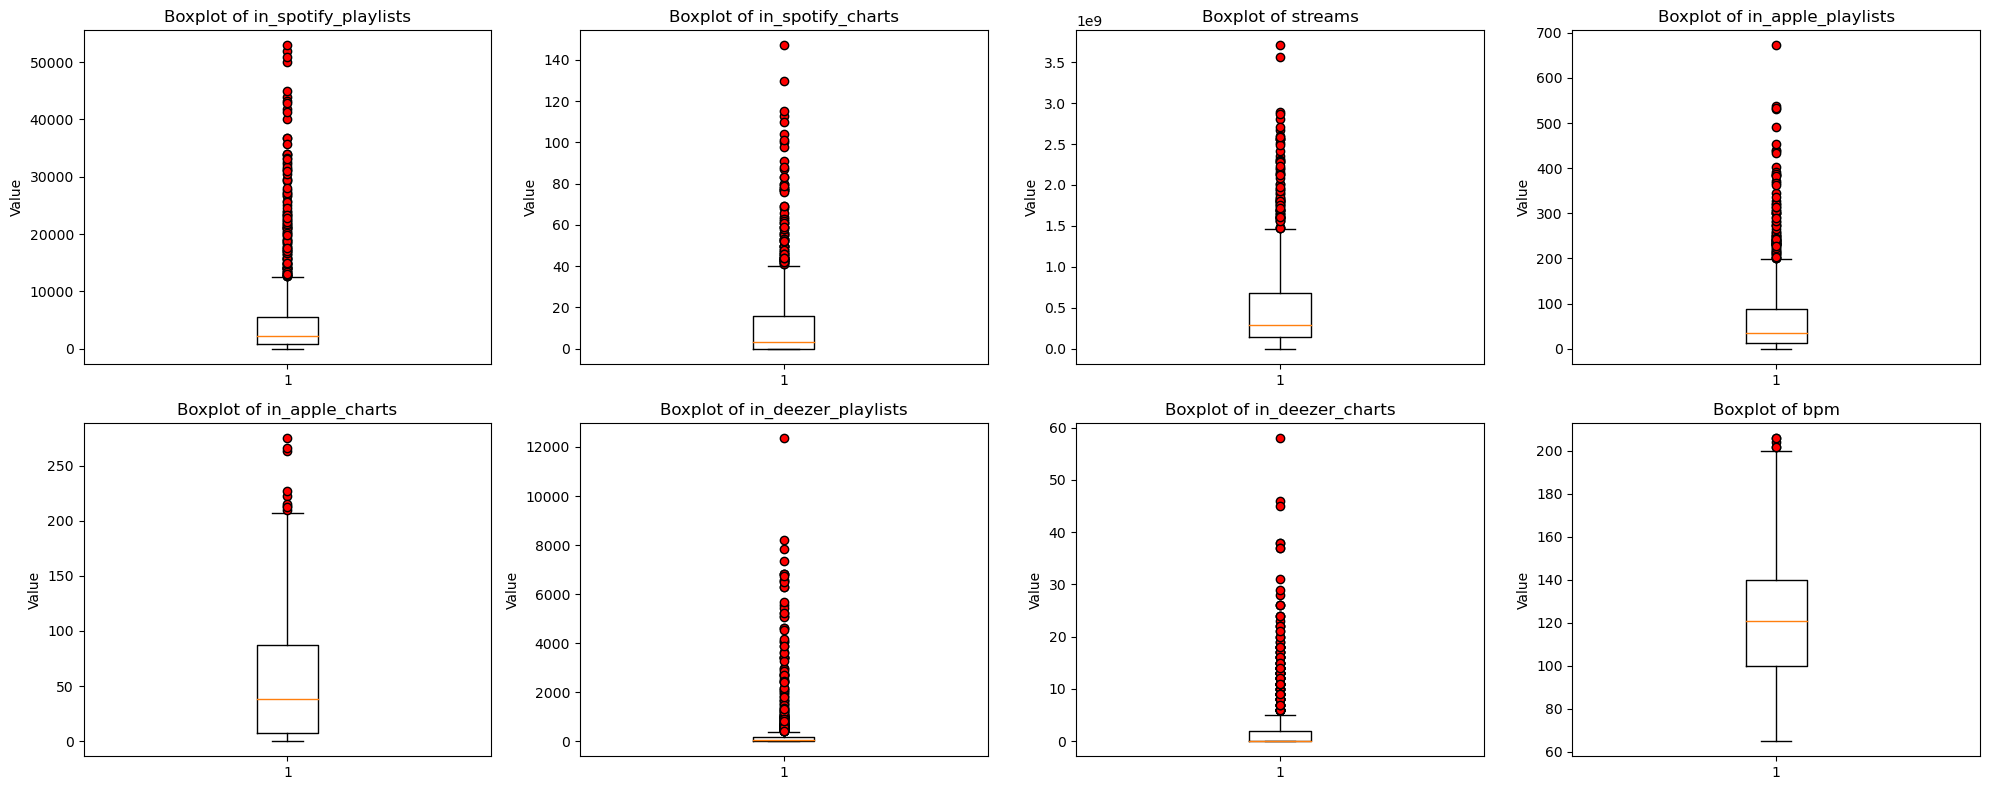

In [14]:
#visualize potential outliers
columns_to_plot = ['in_spotify_playlists',
    'in_spotify_charts',
    'streams',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts', 'bpm']

num_plots = len(columns_to_plot)
cols = 4 
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

outliermark = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(df[col].dropna(), flierprops=outliermark)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Value')

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# data  dataset is already filtered to only include hit songs, it makes total sense that:

#The data is right-skewed (big artists, viral moments).

#The “outliers” aren’t errors — they’re actually the whole point of the data.

#we’re not working with the average song, so typical outlier logic doesn’t apply.

In [15]:
# apply log function to deal with upwards skew: Compress extreme values,
#Reveal patterns between medium and high-performing songs, make for better performing models
cols_to_log = ['in_spotify_playlists', 'in_spotify_charts', 'streams',
               'in_apple_playlists', 'in_apple_charts',
               'in_deezer_playlists', 'in_deezer_charts']
#perhasps run IQR stuff to get specific outlier stats

for col in cols_to_log:
    df[col] = np.log1p(df[col])  # replaces original column with log version

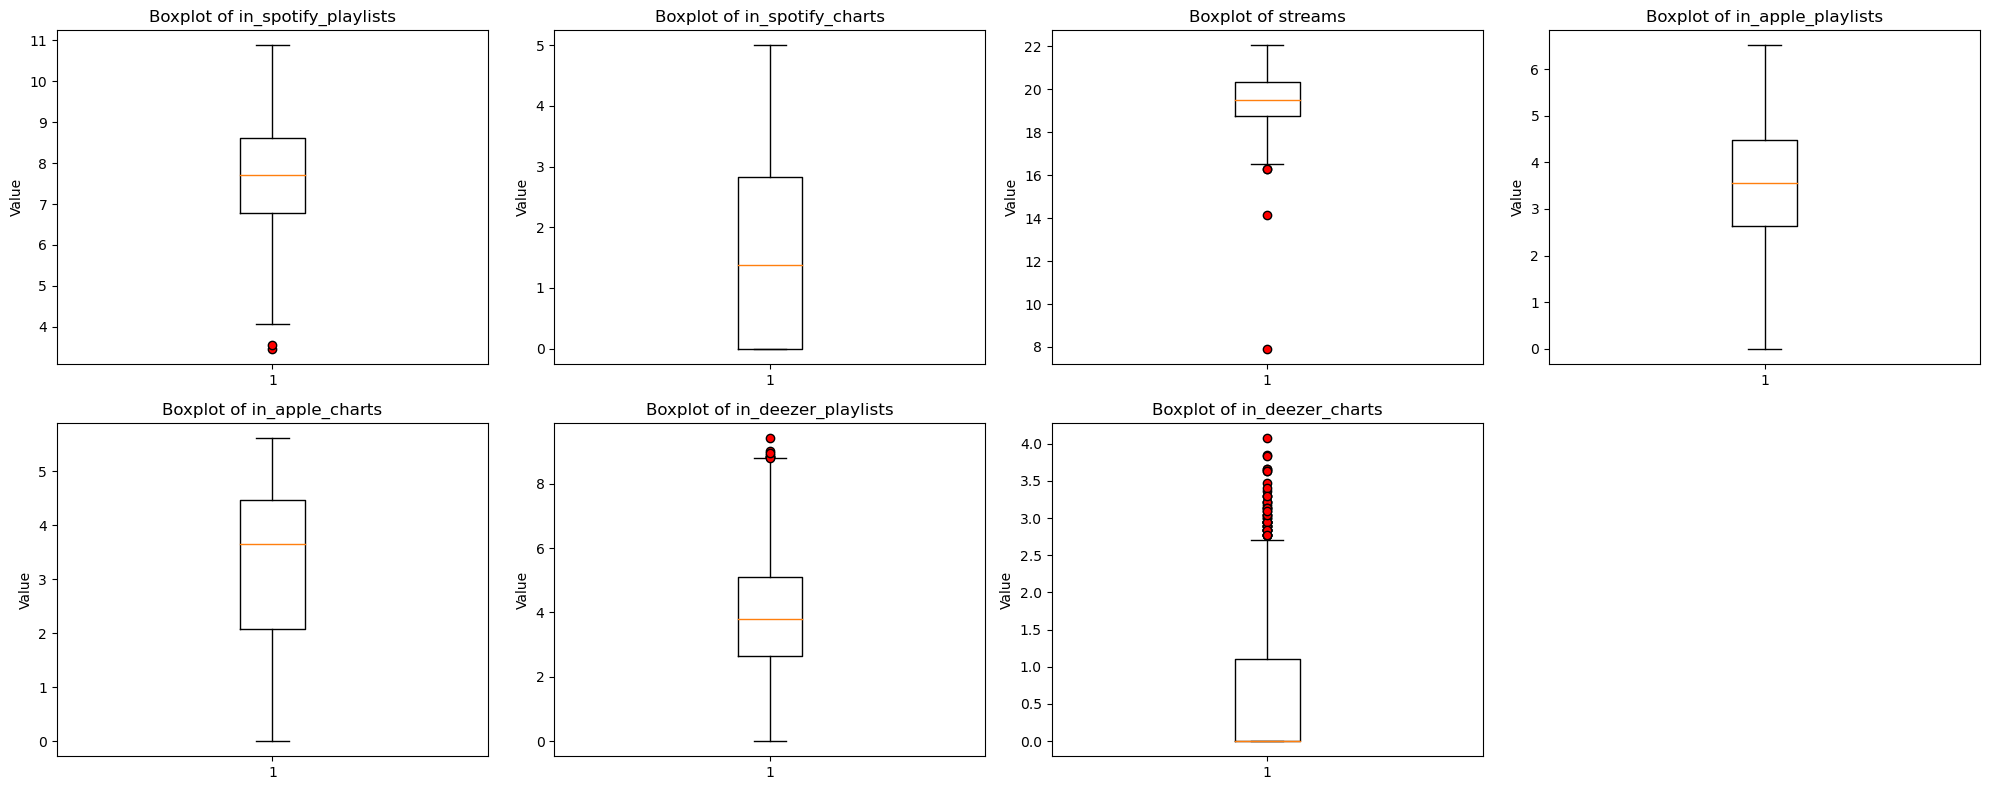

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts
count,953.000000,953.000000,952.000000,953.000000,953.000000,953.000000,953.000000
mean,7.717898,1.510467,19.506648,3.499060,3.151817,3.999342,0.656317
std,1.329587,1.501203,1.146289,1.332688,1.606014,1.911520,0.963816
min,3.465736,0.000000,7.924072,0.000000,0.000000,0.000000,0.000000
25%,6.775366,0.000000,18.768772,2.639057,2.079442,2.639057,0.000000
50%,7.707512,1.386294,19.487220,3.555348,3.663562,3.806662,0.000000
75%,8.620291,2.833213,20.328546,4.488636,4.477337,5.105945,1.098612
max,10.876140,4.997212,22.032651,6.511745,5.620401,9.422868,4.077537


In [19]:
#visualize new log transformed data
#visualize potential outliers
columns_to_plot = ['in_spotify_playlists',
    'in_spotify_charts',
    'streams',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts']

num_plots = len(columns_to_plot)
cols = 4 
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

outliermark = dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none')

for i, col in enumerate(columns_to_plot):
    axes[i].boxplot(df[col].dropna(), flierprops=outliermark)
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Value')

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#get popularity stats
df[cols_to_log].describe()

In [21]:
# drop 'in_deezer_charts' due to significant outliers even after log transformation
df.drop('in_deezer_charts', axis=1, inplace=True)

In [23]:
logcol=['in_spotify_playlists',
    'in_spotify_charts',
    'streams',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    ]
def count_outliers_iqr(df, columns):
    outlier_counts = {} #move this up maybe

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_counts[col] = count

    return outlier_counts
print(count_outliers_iqr(df,logcol))


{'in_spotify_playlists': 2, 'in_spotify_charts': 0, 'streams': 4, 'in_apple_playlists': 0, 'in_apple_charts': 0, 'in_deezer_playlists': 8}


In [24]:

for i, col in enumerate(['in_spotify_playlists','streams', 'in_deezer_playlists']):
    df = df[(df[f'{col}'] - df[f'{col}'].mean()).abs() <= 2 * df[f'{col}'].std()]


In [25]:
print(count_outliers_iqr(df,logcol))

{'in_spotify_playlists': 0, 'in_spotify_charts': 0, 'streams': 0, 'in_apple_playlists': 0, 'in_apple_charts': 0, 'in_deezer_playlists': 0}


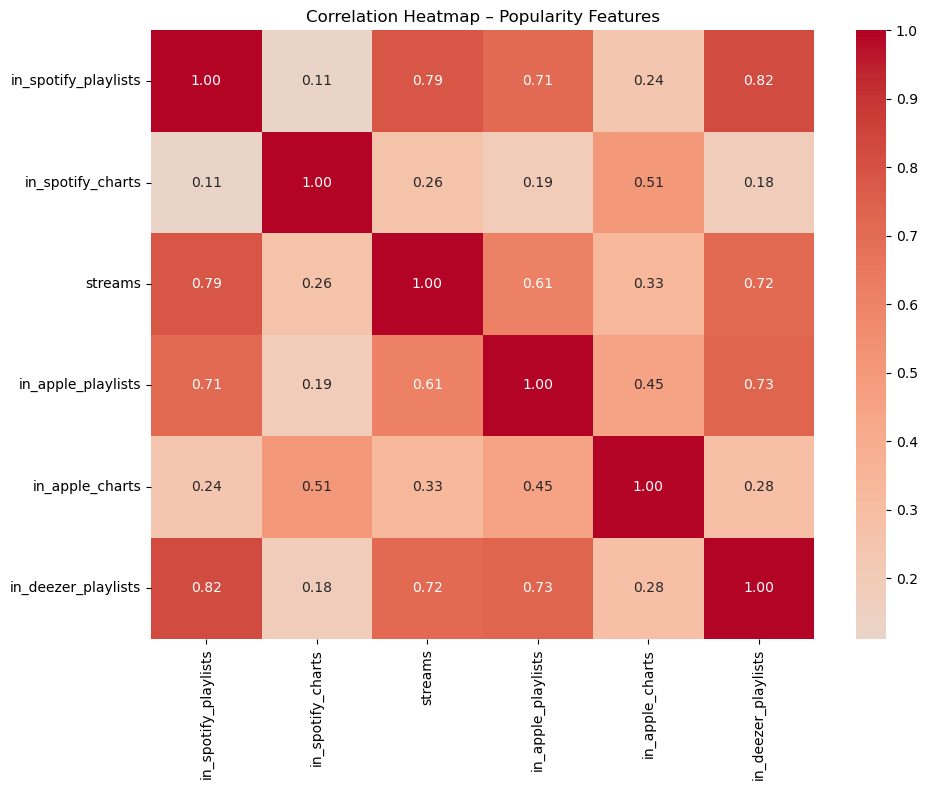

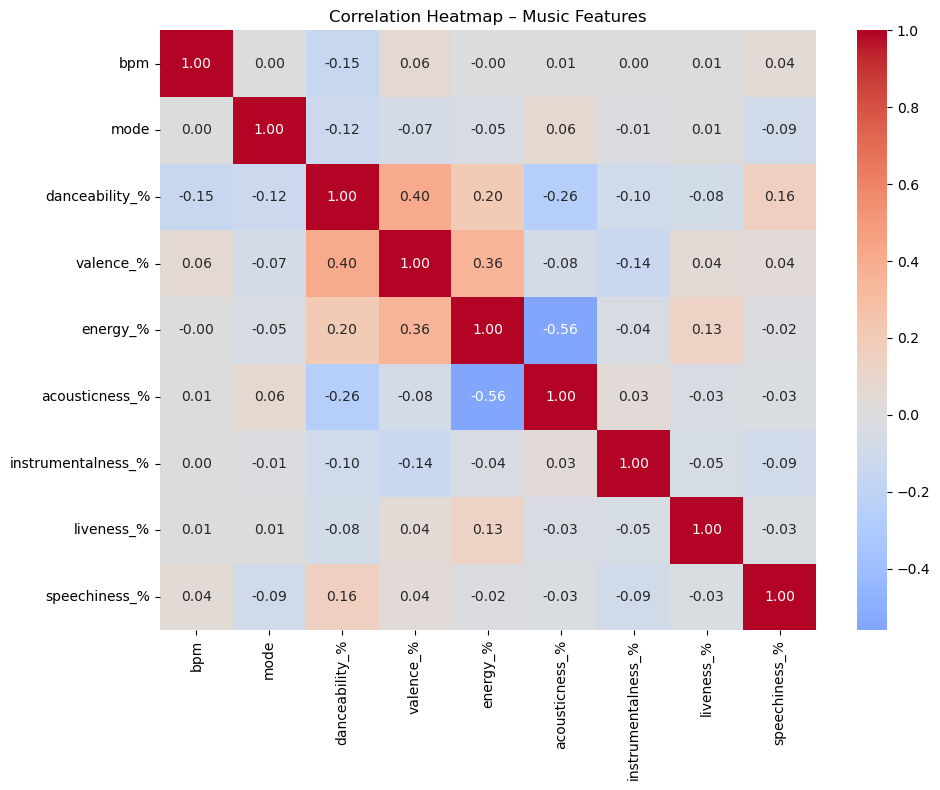

In [31]:
# heatmaps to show correlations
music_features = df[['bpm', 'mode', 'danceability_%', 'valence_%', 
                     'energy_%', 'acousticness_%', 'instrumentalness_%', 
                     'liveness_%', 'speechiness_%']]

popularity = df[logcol]  # assuming logcol is a list of your popularity-based features

# Correlation matrices
corr1 = popularity.corr()
corr2 = music_features.corr()

# First heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap – Popularity Features")
plt.tight_layout()
plt.show()

# Second heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr2, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap – Music Features")
plt.tight_layout()
plt.show()


In [ ]:
#insert comments about heatmaps: how playlists and chart position arent too correlated, deezer bridges the gap; 
#music featuresnot really realted

In [45]:
#feature engineering mood
def get_mood(row):
    valence = row['valence_%']
    energy = row['energy_%']
    dance = row['danceability_%']
    speech = row['speechiness_%']
    bpm = row['bpm']
    mode = row['mode']  

    if valence > 70 and energy > 70 and mode == 1 and bpm > 110:
        return 'High-Energy Happy'
    elif valence < 40 and energy < 40 and mode == 0 and bpm < 90:
        return 'Sad / Low Energy'
    elif dance > 65 and valence > 60 and bpm > 100:
        return 'Feel-Good Groove'
    elif speech > 50 and bpm > 90:
        return 'Rap / Talky'
    elif acoustic := row.get('acousticness_%', 0) > 60 and bpm < 90:
        return 'Chill / Acoustic'
    elif bpm >= 100 and energy > 60:
        return 'Hype / Dance'
    else:
        return 'Neutral / Mixed'

df['mood'] = df.apply(get_mood, axis=1)

df[['track_name','mood']].head(20)

,track_name,mood
0,Seven (feat. Latto) (Explicit Ver.),High-Energy Happy
1,LALA,Neutral / Mixed
2,vampire,Neutral / Mixed
3,Cruel Summer,Hype / Dance
4,WHERE SHE GOES,Hype / Dance
5,Sprinter,Feel-Good Groove
6,Ella Baila Sola,Feel-Good Groove
7,Columbia,Hype / Dance
8,fukumean,Hype / Dance
9,La Bebe - Remix,Neutral / Mixed


In [ ]:
#inserted graphed insights here before ML: season against multiple mood, etc.

In [61]:
numeric_cols = [
    'bpm', 'mode', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%','season'
]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[numeric_cols])


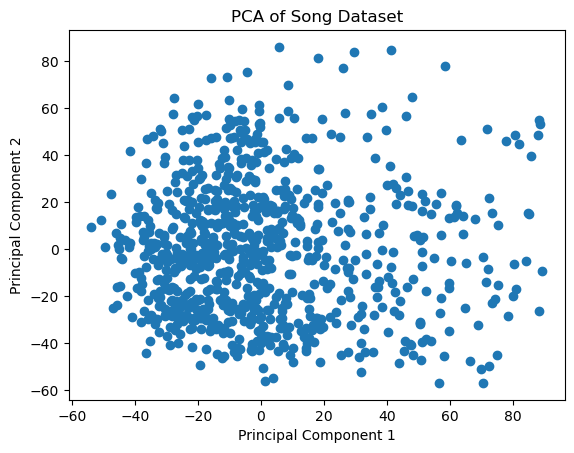

In [62]:
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Song Dataset')
plt.show()
